In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnudarshan","key":"1d8ec5f91eb354a34e5f83e7a2d63912"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c home-data-for-ml-course

  0% 0.00/82.0k [00:00<?, ?B/s]
100% 82.0k/82.0k [00:00<00:00, 31.4MB/s]
  0% 0.00/89.2k [00:00<?, ?B/s]
100% 89.2k/89.2k [00:00<00:00, 87.0MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.0MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.1MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.4MB/s]
  0% 0.00/15.3k [00:00<?, ?B/s]
100% 15.3k/15.3k [00:00<00:00, 18.2MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 95.4MB/s]


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler


In [0]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [89]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
train_df.corr()['SalePrice'].sort_values

<bound method Series.sort_values of Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Sa

In [124]:
train_df.drop(['MSSubClass', 'OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','MiscVal','YrSold'], axis=1)
test_df.drop(['MSSubClass', 'OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','MiscVal','YrSold'], axis=1)


,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,1461,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,270.0,882.0,GasA,TA,Y,SBrkr,896,0,896,0.0,1,0,2,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,120,0,NaN,MnPrv,NaN,6,WD,Normal
1,1462,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,1329,0.0,1,1,3,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,NaN,NaN,Gar2,6,WD,Normal
2,1463,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,1629,0.0,2,1,3,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,NaN,MnPrv,NaN,3,WD,Normal
3,1464,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,1604,0.0,2,1,3,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,NaN,NaN,NaN,6,WD,Normal
4,1465,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,1280,0.0,2,0,2,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,144,0,NaN,NaN,NaN,1,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,1092,0.0,1,1,3,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,NaN,NaN,NaN,6,WD,Normal
1455,2916,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,294.0,546.0,GasA,TA,Y,SBrkr,546,546,1092,0.0,1,1,3,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,NaN,NaN,NaN,4,WD,Abnorml
1456,2917,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,1224,1.0,1,0,4,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,NaN,NaN,NaN,9,WD,Abnorml
1457,2918,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,575.0,912.0,GasA,TA,Y,SBrkr,970,0,970,0.0,1,0,3,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,NaN,MnPrv,Shed,7,WD,Normal


In [0]:
final_train = train_df[['GarageArea','GarageCars','GarageYrBlt','YearRemodAdd','OverallQual','YearBuilt','Fireplaces','TotRmsAbvGrd','FullBath','GrLivArea','1stFlrSF','TotalBsmtSF','MasVnrArea','SalePrice']].copy()
final_test = test_df[['GarageArea','GarageCars','GarageYrBlt','YearRemodAdd','OverallQual','YearBuilt','Fireplaces','TotRmsAbvGrd','FullBath','GrLivArea','1stFlrSF','TotalBsmtSF','MasVnrArea']].copy()

In [120]:
final_train.head()

,GarageArea,GarageCars,GarageYrBlt,YearRemodAdd,OverallQual,YearBuilt,Fireplaces,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,MasVnrArea,SalePrice
0,548,2,2003.0,2003,7,2003,0,8,2,1710,856,856,196.0,208500
1,460,2,1976.0,1976,6,1976,1,6,2,1262,1262,1262,0.0,181500
2,608,2,2001.0,2002,7,2001,1,6,2,1786,920,920,162.0,223500
3,642,3,1998.0,1970,7,1915,1,7,1,1717,961,756,0.0,140000
4,836,3,2000.0,2000,8,2000,1,9,2,2198,1145,1145,350.0,250000


In [127]:
final_test.head()

,GarageArea,GarageCars,GarageYrBlt,YearRemodAdd,OverallQual,YearBuilt,Fireplaces,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,MasVnrArea
0,730.0,1.0,1961.0,1961,5,1961,0,5,1,896,896,882.0,0.0
1,312.0,1.0,1958.0,1958,6,1958,0,6,1,1329,1329,1329.0,108.0
2,482.0,2.0,1997.0,1998,5,1997,1,6,2,1629,928,928.0,0.0
3,470.0,2.0,1998.0,1998,6,1998,1,7,2,1604,926,926.0,20.0
4,506.0,2.0,1992.0,1992,8,1992,0,5,2,1280,1280,1280.0,0.0


In [0]:
final_train = final_train.dropna()
final_test = final_test.dropna()

In [0]:
X = final_train.drop(columns=['SalePrice'])
y = final_train['SalePrice']

In [121]:
from tensorflow.keras import losses
model = Sequential()

model.add(Dense(13,activation = 'relu',input_shape=(13,)))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(1))

model.compile(loss=losses.mean_squared_error,optimizer='adam', metrics=['accuracy'])
model.fit(X,y,epochs=100,verbose=2)

Train on 1371 samples
Epoch 1/100
1371/1371 - 0s - loss: 39636459543.9008 - acc: 0.0000e+00
Epoch 2/100
1371/1371 - 0s - loss: 37789554431.0664 - acc: 0.0000e+00
Epoch 3/100
1371/1371 - 0s - loss: 32622101777.3654 - acc: 0.0000e+00
Epoch 4/100
1371/1371 - 0s - loss: 21844627634.5091 - acc: 0.0000e+00
Epoch 5/100
1371/1371 - 0s - loss: 8776140336.9220 - acc: 0.0000e+00
Epoch 6/100
1371/1371 - 0s - loss: 3938838850.6608 - acc: 0.0000e+00
Epoch 7/100
1371/1371 - 0s - loss: 3784862103.8074 - acc: 0.0000e+00
Epoch 8/100
1371/1371 - 0s - loss: 3731640889.8848 - acc: 0.0000e+00
Epoch 9/100
1371/1371 - 0s - loss: 3669921917.9460 - acc: 0.0000e+00
Epoch 10/100
1371/1371 - 0s - loss: 3594151719.0255 - acc: 0.0000e+00
Epoch 11/100
1371/1371 - 0s - loss: 3508347506.6492 - acc: 0.0000e+00
Epoch 12/100
1371/1371 - 0s - loss: 3430504934.2319 - acc: 0.0000e+00
Epoch 13/100
1371/1371 - 0s - loss: 3309547238.6054 - acc: 0.0000e+00
Epoch 14/100
1371/1371 - 0s - loss: 3201020989.6193 - acc: 0.0000e+00
Epo

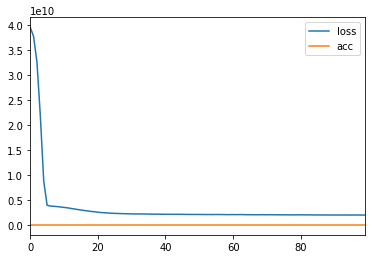

In [122]:
import seaborn as sns
graph = pd.DataFrame(model.history.history)
graph.plot()

In [123]:
test_dat = np.array([548,	2	,2003.0	,2003,	7,	2003,	0	,8,	2	,1710	,856	,856,	196.0])

print(model.predict(test_dat.reshape(1,13),batch_size=1))

[[191749.33]]


In [132]:
output_values = pd.DataFrame(model.predict(final_test))
output_values

,0
0,144516.843750
1,168638.937500
2,173978.750000
3,172339.734375
4,172833.296875
...,...
1361,166726.109375
1362,104234.914062
1363,104265.804688
1364,171116.234375
